In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
import pandas as pd
from qbstyles import mpl_style

In [2]:
# change the charting style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# plt.style.use("ggplot")
mpl_style(dark=False)

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
results = pd.read_csv('https://raw.githubusercontent.com/openelections/openelections-data-pa/master/2016/20161108__pa__general__precinct.csv',
    names=['Election Year',
    'Election Type',
    'County Code',
    'Precinct Code',
    'Candidate Office Rank',
    'Candidate District',
    'Candidate Party Rank',
    'Candidate Ballot Position',
    'Candidate Office Code',
    'Candidate Party Code *',
    'Candidate Number',
    'Candidate Last Name',
    'Candidate First Name',
    'Candidate Middle Name',
    'Candidate Suffix',
    'Vote Total',
    'U.S. Congressional District',
    'State Senatorial District',
    'State House District',
    'Municipality Type Code',
    'Municipality Name',
    'Municipality Breakdown Code 1',
    'Municipality Breakdown Name 1',
    'Municipality Breakdown Code 2',
    'Municipality Breakdown Name 2',
    'Bi-County Code',
    'MCD Code',
    'FIPS Code',
    'VTD code',
    'Previous Precinct Code',
    'Previous U.S. Congressional District',
    'Previous State Senatorial District',
    'Previous State House District'])

results.head(5)

/Users/chriszs/.local/share/virtualenvs/pa-battleground-counties-o0viiadf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Election Year,Election Type,County Code,Precinct Code,Candidate Office Rank,Candidate District,Candidate Party Rank,Candidate Ballot Position,Candidate Office Code,Candidate Party Code *,...,Municipality Breakdown Code 2,Municipality Breakdown Name 2,Bi-County Code,MCD Code,FIPS Code,VTD code,Previous Precinct Code,Previous U.S. Congressional District,Previous State Senatorial District,Previous State House District
0,2016,G,1,10,1,0,1,1,USP,DEM,...,NaN,NaN,0,5,1,10,0,19,33,193
1,2016,G,1,20,1,0,1,1,USP,DEM,...,NaN,NaN,0,10,1,20,0,19,33,91
2,2016,G,1,30,1,0,1,1,USP,DEM,...,NaN,NaN,0,15,1,30,0,19,33,193
3,2016,G,1,40,1,0,1,1,USP,DEM,...,NaN,NaN,0,20,1,40,0,19,33,193
4,2016,G,1,50,1,0,1,1,USP,DEM,...,NaN,NaN,0,25,1,50,0,19,33,193


In [5]:
president_results = results[results['Candidate Office Code'] == 'USP'].copy()

In [6]:
candidates = president_results['Candidate Last Name'].unique().tolist()

candidates

['CLINTON', 'TRUMP', 'CASTLE', 'STEIN', 'JOHNSON']

In [7]:
president_results['precint'] = president_results['County Code'] + president_results['Precinct Code']

In [8]:
president_results_table = pd.pivot_table(president_results, index=['precint'], columns=['Candidate Last Name'], values='Vote Total', aggfunc=np.sum)

president_results_table.head(10)

Candidate Last Name,CASTLE,CLINTON,JOHNSON,STEIN,TRUMP
precint,,,,,
9,2,99,7,4,117
11,2,119,13,3,274
12,5,433,19,7,544
13,4,198,11,2,352
15,13,1165,80,17,2894
16,12,239,39,13,636
17,5,252,26,6,854
18,0,7,3,0,57
19,10,1298,65,21,1263


In [9]:
president_results_table['votes'] = president_results_table[candidates].sum(axis=1)
president_results_table['clinton_percent'] = president_results_table['CLINTON']/president_results_table['votes']
president_results_table['trump_percent'] = president_results_table['TRUMP']/president_results_table['votes']

president_results_table['margin'] = president_results_table['trump_percent']-president_results_table['clinton_percent']

president_results_table

Candidate Last Name,CASTLE,CLINTON,JOHNSON,STEIN,TRUMP,votes,clinton_percent,trump_percent,margin
precint,,,,,,,,,
9,2,99,7,4,117,229,0.43,0.51,0.08
11,2,119,13,3,274,411,0.29,0.67,0.38
12,5,433,19,7,544,1008,0.43,0.54,0.11
13,4,198,11,2,352,567,0.35,0.62,0.27
15,13,1165,80,17,2894,4169,0.28,0.69,0.41
16,12,239,39,13,636,939,0.25,0.68,0.42
17,5,252,26,6,854,1143,0.22,0.75,0.53
18,0,7,3,0,57,67,0.10,0.85,0.75
19,10,1298,65,21,1263,2657,0.49,0.48,-0.01


In [10]:
bins = [
    -1,
    -0.9,
    -0.8,
    -0.7,
    -0.6,
    -0.5,
    -0.4,
    -0.3,
    -0.2,
    -0.1,
    0,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1
]

labels = [str(round(pct*100)) + " to " + str(round((pct+0.1)*100)) + "%" for pct in bins[:-1]]

president_results_table['bins'] = pd.cut(president_results_table['margin'],bins=bins,labels=labels)

president_results_table.sort_values(by='votes',ascending=False).head(10)

Candidate Last Name,CASTLE,CLINTON,JOHNSON,STEIN,TRUMP,votes,clinton_percent,trump_percent,margin,bins
precint,,,,,,,,,,
218,33,4870,237,101,4132,9373,0.52,0.44,-0.08,-10 to 0%
254,45,2870,223,61,6141,9340,0.31,0.66,0.35,30 to 40%
68,43,2501,241,64,5997,8846,0.28,0.68,0.40,30 to 40%
77,48,2768,221,74,5502,8613,0.32,0.64,0.32,30 to 40%
265,39,2528,191,60,5542,8360,0.30,0.66,0.36,30 to 40%
98,26,3894,195,80,4077,8272,0.47,0.49,0.02,0 to 10%
221,35,3695,205,80,4185,8200,0.45,0.51,0.06,0 to 10%
242,52,3118,250,52,4724,8196,0.38,0.58,0.20,10 to 20%
371,33,2642,238,60,4940,7913,0.33,0.62,0.29,20 to 30%


In [11]:
president_results_table.groupby('bins')[['votes']].sum()

Candidate Last Name,votes
bins,
-100 to -90%,244128
-90 to -80%,129973
-80 to -70%,95296
-70 to -60%,88915
-60 to -50%,69689
-50 to -40%,95331
-40 to -30%,147482
-30 to -20%,249051
-20 to -10%,402000


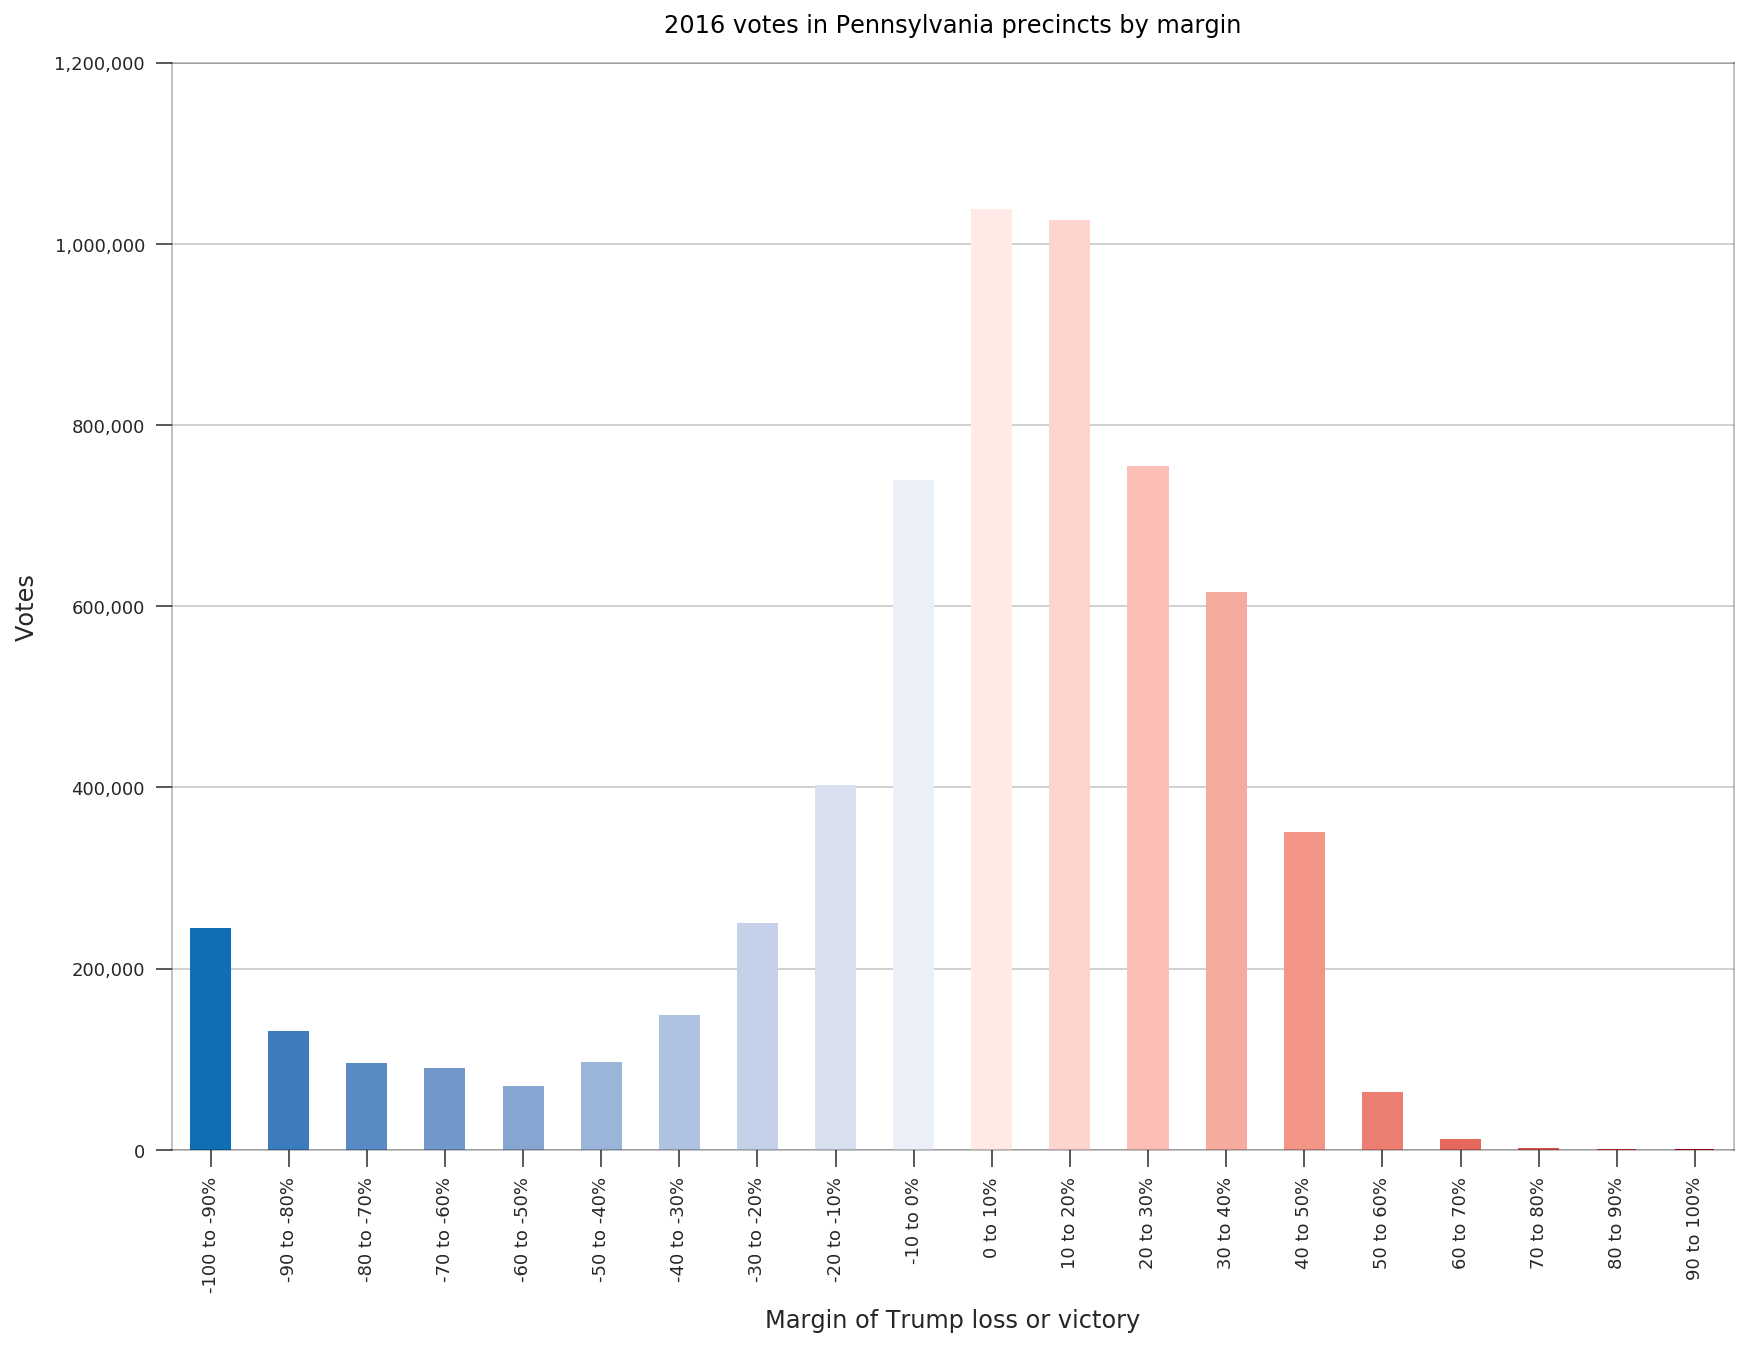

In [14]:
colors = ['#c8011e', '#d23532', '#dc5146', '#e4695b', '#ec7f71', '#f29587', '#f7aa9e', '#fbbfb6', '#fed5ce', '#ffeae6', '#ebf0f8', '#d8e0f0', '#c4d1e9', '#b0c2e1', '#9bb4da', '#87a5d2', '#7197cb', '#598ac3', '#3d7cbc', '#0e6fb4']
ax = president_results_table.groupby('bins')[['votes']].sum().plot.bar(figsize=(14,10),legend=False,alpha=1, stacked=True,color=colors)

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title("2016 votes in Pennsylvania precincts by margin")
ax.set_xlabel("Margin of Trump loss or victory")
ax.set_ylabel("Votes")

ax.set_facecolor('w')
ax.grid(False,axis='x')

ax.set_axisbelow(True)

ax.set_ylim(0,1200000)

for i, bar in enumerate(ax.patches):
    bar.set_color(colors[20-i-1])

plt.show()